In [1]:
#20240409

In [9]:
import os, sys
#os.getcwd() ÌòÑÏû¨ÏúÑÏπò ÏïåÎ†§Ï£ºÎäî Ìï®Ïàò
sys.path.append("C:\\Users\\user\\1")

In [11]:
#from dezero.core_simple import Variable
from dezero import Variable

In [37]:
import numpy as np
from dezero import Variable
from dezero.utils import get_dot_graph

In [38]:
#Sphere Ìï®Ïàò
import numpy as np
from dezero import Variable

def sphere(x, y):
    z = x ** 2 + y ** 2
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = sphere(x, y)
z.backward()
print(x.grad, y.grad)

2.0 2.0


In [39]:
#matyas Ìï®Ïàò
import numpy as np
from dezero import Variable

def matyas(x, y):
    z = 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = matyas(x, y)
z.backward()
print(x.grad, y.grad)

0.040000000000000036 0.040000000000000036


In [ ]:
'''
*ÏãúÍ∞ÅÌôî ÏΩîÎìú
get_dot_graph Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑÎ•º ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò
'''

-5376.0 8064.0


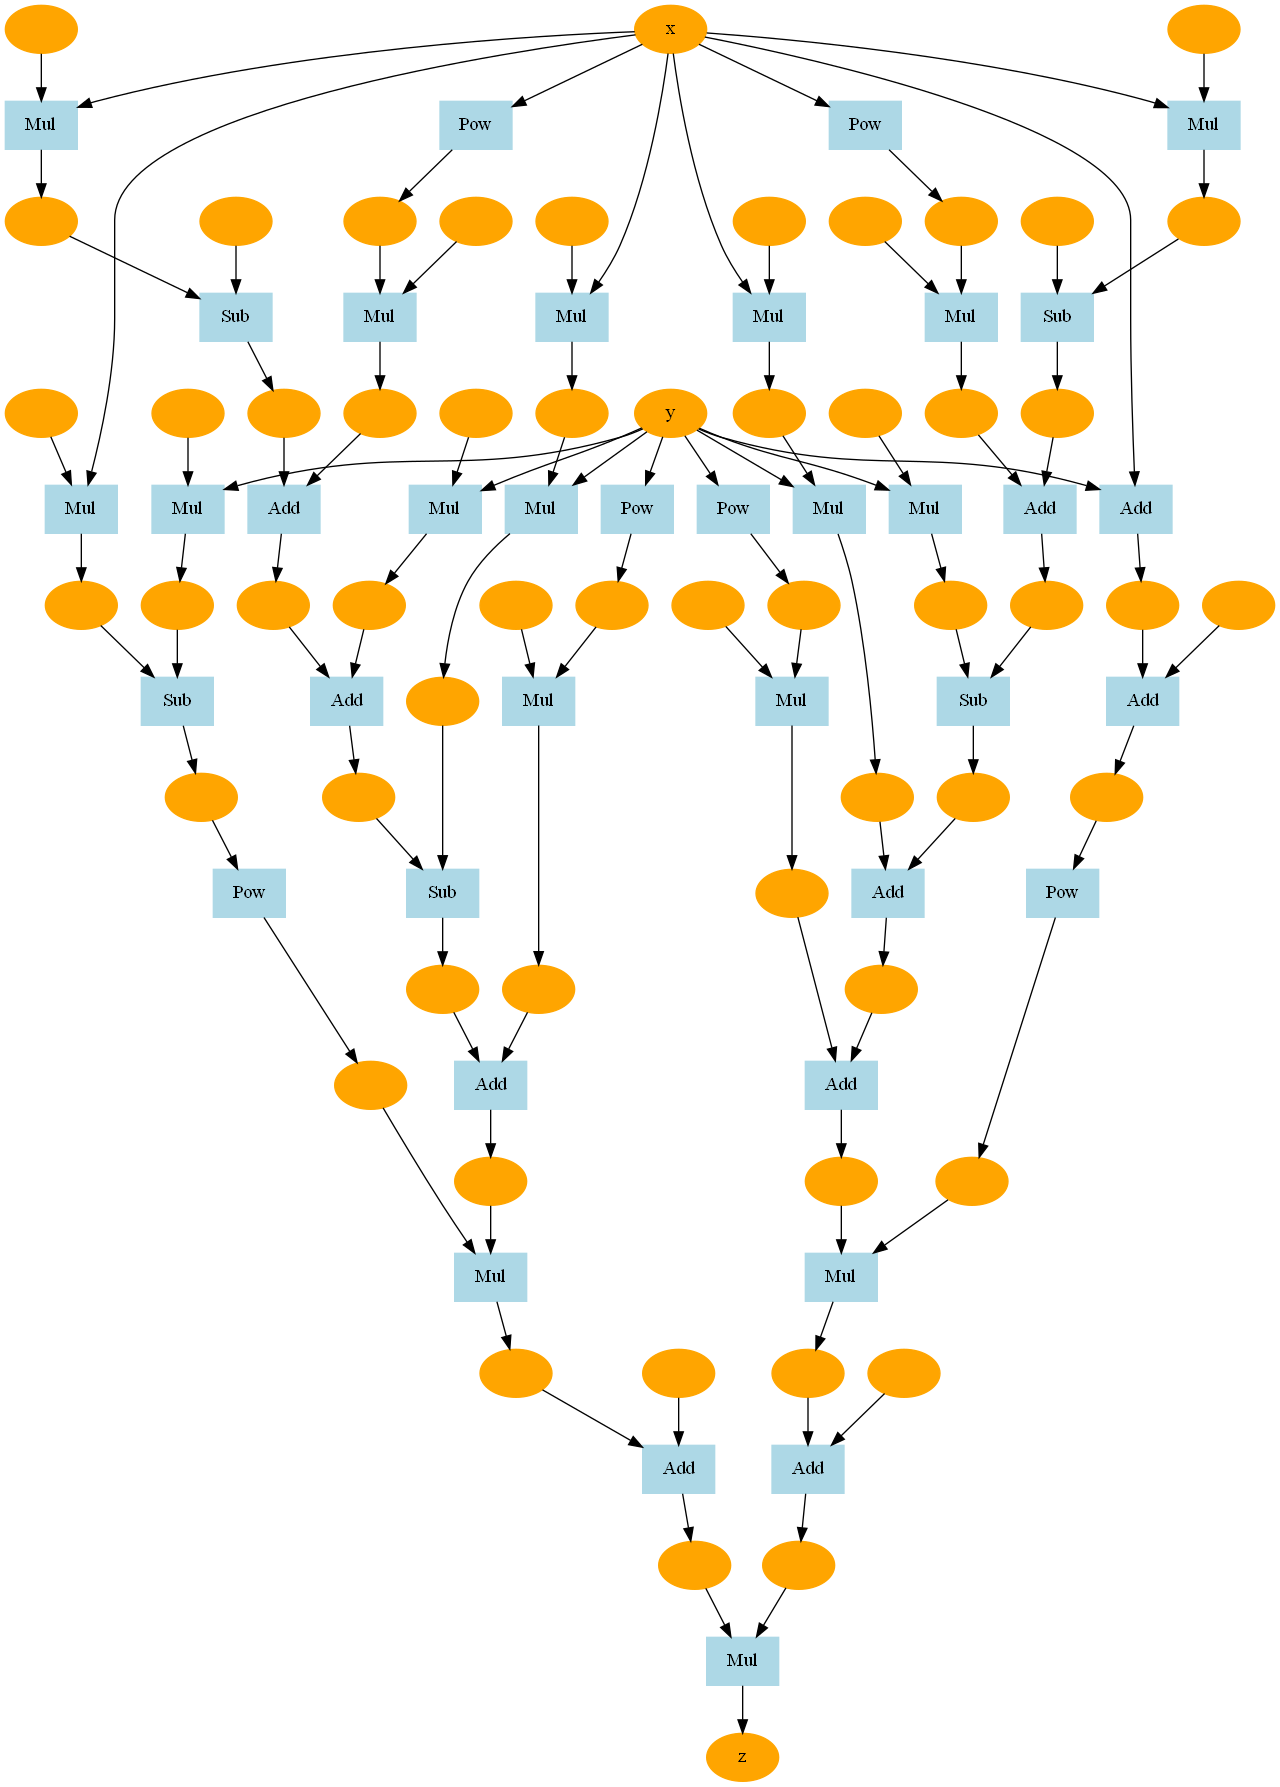

In [40]:
#goldsteim-price Ìï®Ïàò
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)
z.backward()
print(x.grad, y.grad)

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')

In [41]:
#sin Ìï®ÏàòÏùò ÎØ∏Î∂Ñ =cosÌï®Ïàò

import numpy as np
from dezero import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx


def sin(x):
    return Sin()(x)




--- original sin ---
0.7071067811865476
0.7071067811865476


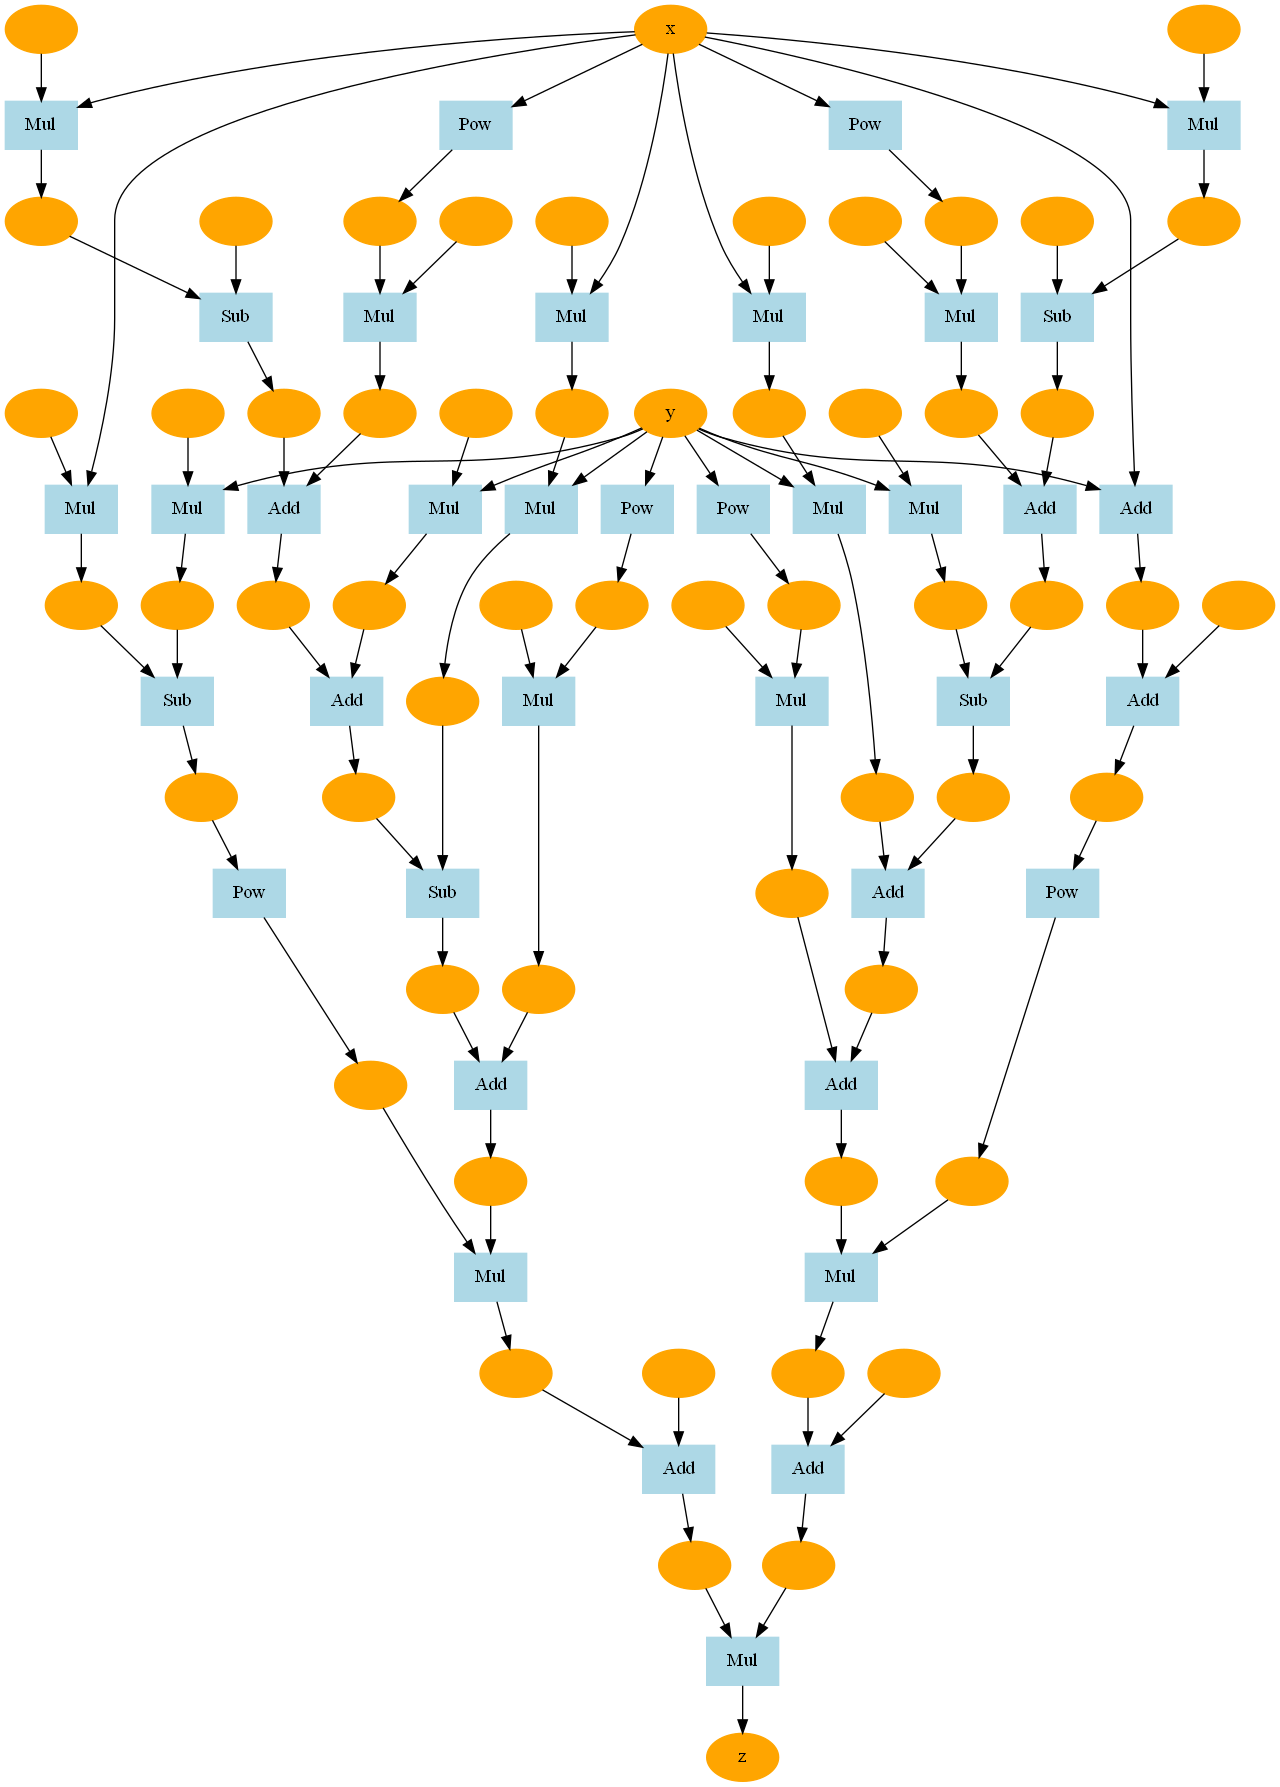

In [42]:
from dezero import Variable

x = Variable(np.array(np.pi / 4))
y = sin(x)
y.backward()
print('--- original sin ---')
print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein_1.png')

In [ ]:
'''
*ÌÖåÏùºÎü¨ Í∏âÏàò Ïù¥Î°†

ÌÖåÏùºÎü¨Í∏âÏàò: Ïñ¥Îñ§ Ìï®ÏàòÎ•º Îã§Ìï≠ÏãùÏúºÎ°ú Í∑ºÏÇ¨ÌïòÎäî Î∞©Î≤ï. (ÏàòÏãùÏÉùÎûµ)
f(x)Î•º Ï†ê aÏóêÏÑú Í≥ÑÏÇ∞Ìï¥Î≥¥Î©¥ ÌÖåÏùºÎü¨Í∏âÏàòÍ∞Ä ÎêúÎã§. aÎäî ÏûÑÏùòÏùò Í∞íÏù¥Í≥† Ïù¥ Ìï≠ÏùÑ Î¨¥ÌïúÌûà Í≥ÑÏÜçÎêòÍ≤å ÎêòÎäîÎç∞
Ïñ¥Îäê ÏãúÏ†êÏóêÏÑú Ï§ëÎã®ÌïòÎ©¥ f(x)Ïùò Í∞íÏùÑ Í∑ºÏÇ¨Ìï† Ïàò ÏûàÍ≤åÎêòÎ©∞ Ìï≠Ïù¥ ÎßéÏïÑÏßàÏàòÎ°ù Í∑ºÏÇ¨Ïùò Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏïÑÏßÑÎã§.
a=0ÏùºÎïåÏùò ÌÖåÏùºÎü¨Í∏âÏàòÎ•º Îß§ÌÅ¥Î°úÎ¶∞ Ï†ÑÍ∞úÎùºÍ≥† ÌïúÎã§. 

'''

In [43]:
#my sin Ìï®Ïàò ÎßåÎì§Í∏∞
import math

def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y


0.7071064695751781
0.7071032148228457


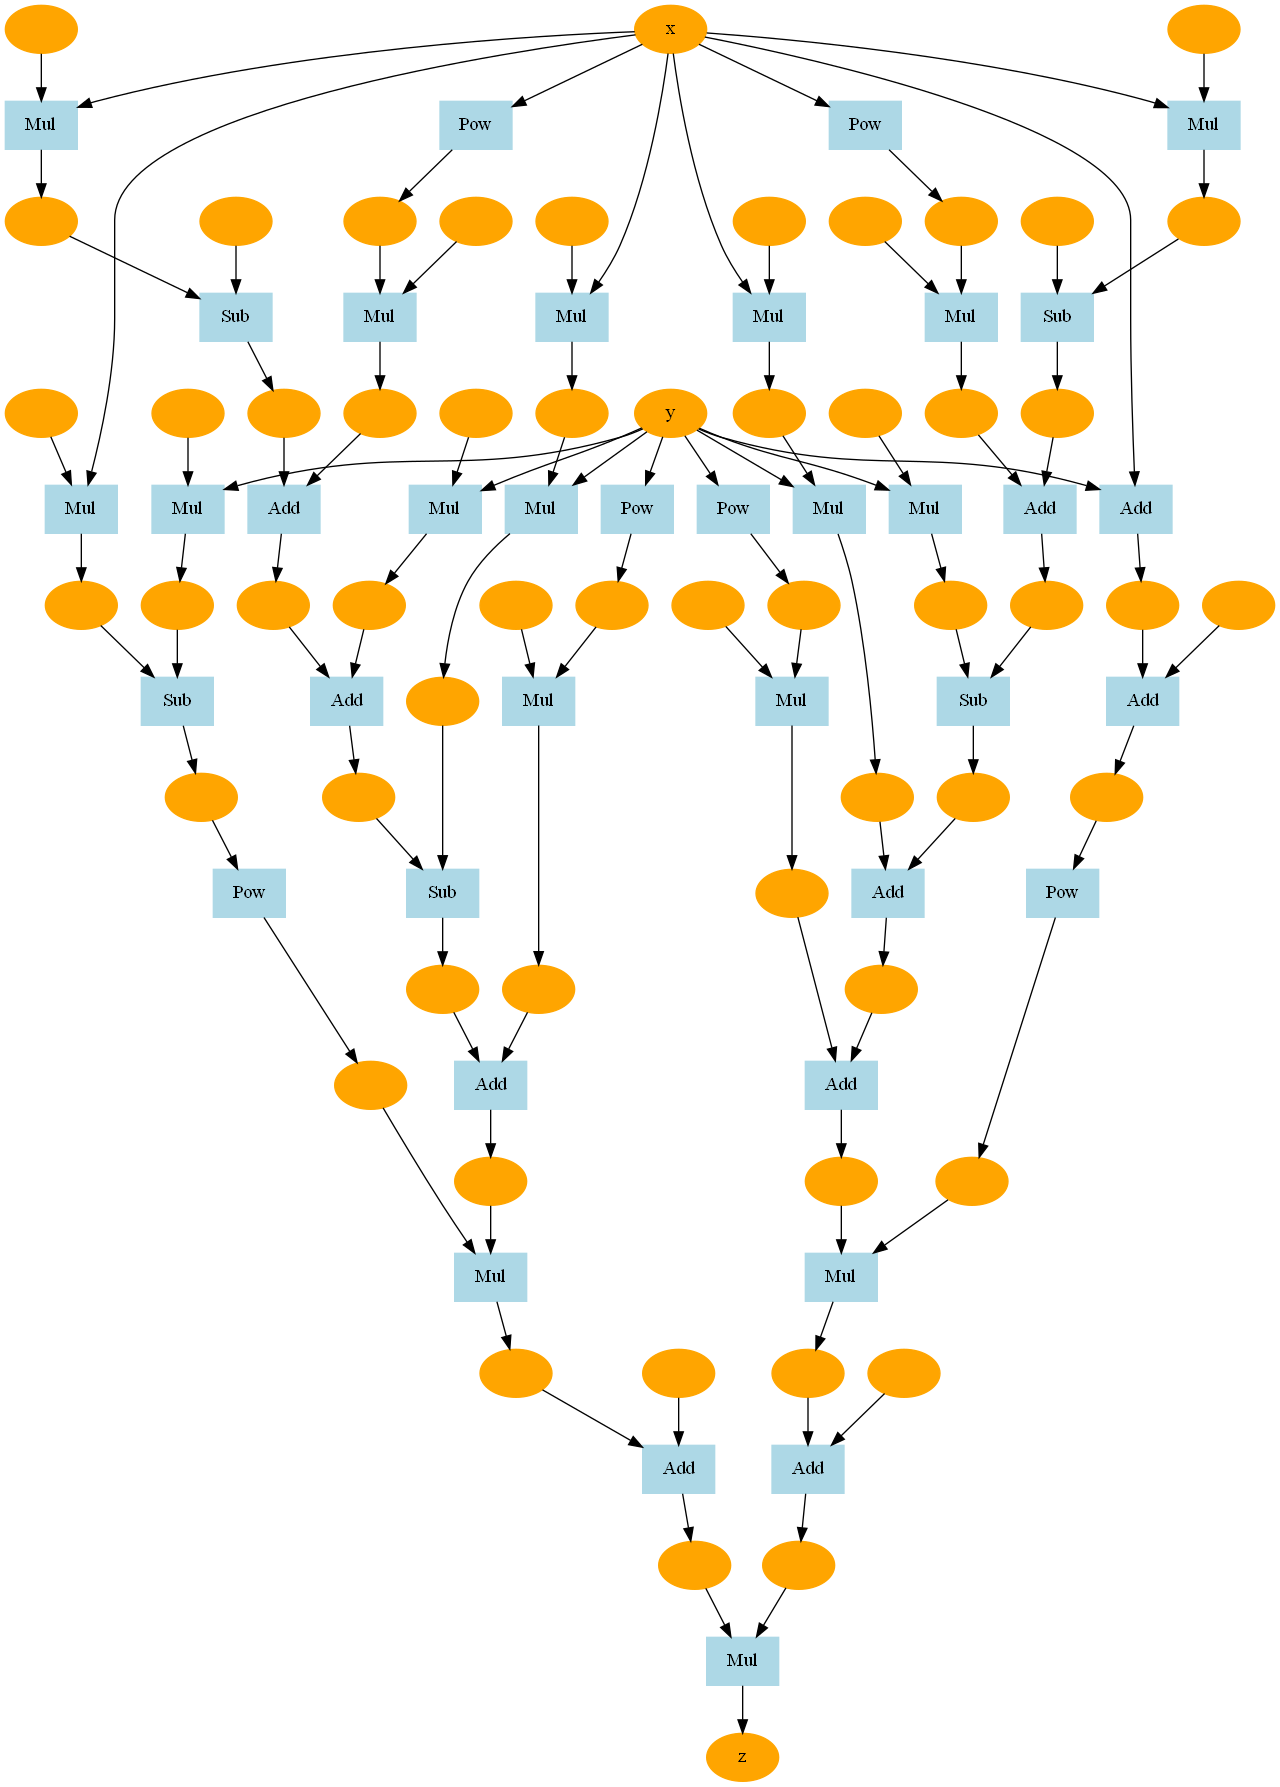

In [44]:
x = Variable(np.array(np.pi / 4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein_2.png')

In [49]:
import math

def my_sin(x, threshold=1e-150):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y


x = Variable(np.array(np.pi / 4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, to_file='goldstein_3.png')

0.7071067811865475
0.7071067811865475


In [46]:
'''
ÏµúÏ†ÅÌôîÎ•º Î∞∞Ïö∞Îäî Ïù¥Ïú†: ÏÜêÏã§Ìï®ÏàòÎ•º ÏµúÏÜåÌôî ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ÏÑúÏù¥Îã§.
Ïã†Í≤ΩÎßùÏùò ÌïôÏäµ Î™©ÌëúÎèÑ ÏÜêÏã§ Ìï®ÏàòÏùò Ï∂úÎ†•ÏùÑ ÏµúÏÜåÌôîÌïòÎäî Îß§Í∞úÎ≥ÄÏàòÎ•º Ï∞æÎäî Í≤ÉÏù¥ÎØÄÎ°ú ÏµúÏ†ÅÌôîÏóê ÏÜçÌïúÎã§.
Í≥†Î°ú ÎØ∏Î∂ÑÏù¥ Í∞ÄÎä•ÌïòÎ©¥ Í≥ÑÏÜç ÎØ∏Î∂ÑÌï¥ÏïºÌïúÎã§. Í∞ÄÏò§Î¶¨Î™®ÏñëÏ≤òÎüº ÏÉùÍ≤ºÏùå.

<Î°úÏ††Î∏åÎ°ù Ìï®Ïàò ÏµúÏ†ÅÌôî>
ÏàòÏãù: y = 100(ùíôùüè ‚àí ùíôùüé^2)^2 + (1 ‚àí ùíôùüé)^2
Ï∂úÎ†•Ïù¥ ÏµúÏÜåÍ∞Ä ÎêòÎäî ùíôùüèÏôÄ ùíô0ÏùÑ Ï∞æÎäîÍ≤ÉÏù¥ Î™©ÌëúÏù¥Í≥† ÏµúÏÜüÍ∞íÏùÄ (1.1)Ïù¥Îã§.  

<Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ï>
Î≥µÏû°Ìïú ÌòïÏÉÅÏùò Ìï®ÏàòÎùºÎ©¥ Í∏∞Ïö∏Í∏∞Í∞Ä Í∞ÄÎ¶¨ÌÇ§Îäî Î∞©Ìñ•Ïóê Î∞òÎìúÏãú ÏµúÏÜüÍ∞íÏù¥ Ï°¥Ïû¨ÌïòÏßÄÎäî ÏïäÎäîÎã§.
Í∏∞Ïö∏Í∏∞Îäî Ìï®ÏàòÏùò Ï∂úÎ†•ÏùÑ Í∞ÄÏû• ÌÅ¨Í≤å ÌïòÎäî Î∞©Ìñ•ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. 
Í∏∞Ïö∏Í∏∞ Î∞©Ìñ•ÏúºÎ°ú ÏùºÏ†ï Í±∞Î¶¨ÎßåÌÅº Ïù¥Îèô->Îã§Ïãú Í∏∞Ïö∏Í∏∞Î•º Íµ¨ÌïòÎäî ÏûëÏóÖÏùÑ Î∞òÎ≥µÌïòÎ©¥ ÏµúÏÜüÍ∞íÏóê Ï†ëÍ∑ºÌï†ÏßÄÎèÑ Î™®Î•∏Îã§.
Îã§Îßå Ï¥àÍπÉÍ∞íÏù¥ Ï§ëÏöîÌïòÎã§. Ï¥àÍπÉÍ∞íÏùÑ ÏûòÎ™ªÏÑ§Ï†ïÌï†Ïãú ÏàòÌñâÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Ïò§ÎûòÍ±∏Î¶¨Í±∞ÎÇò Í≤∞Í¥èÍ∞íÏù¥ ÎÇòÏò§ÏßÄ ÏïäÎäî Îì±Ïùò Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏¥Îã§.
+ Í≥®ÏßúÍ∏∞Í∞Ä Í∏∏Í≤å ÎªóÏùÄ Ìï®ÏàòÏóêÏÑú Ïûò ÎåÄÏùëÌïòÏßÄ Î™ªÌïúÎã§(ex.Î°úÏ††Î∏îÎ°ù Ìï®Ïàò)
Ïù¥Î•º Î≥¥ÏôÑÌïòÍ∏∞ÏúÑÌï¥ Ï†úÏãúÎêòÎäî Í≤ÉÏù¥ Îâ¥ÌÑ¥Î∞©Î≤ï.

<Îâ¥ÌÑ¥Î∞©Î≤ï>(ÏàòÎèôÍ≥ÑÏÇ∞)
Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÏùÄ Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÏùÄ Í≥ÑÍ≥°ÏóêÏÑú ÏÑúÏÑúÌûà ÏµúÏÜüÍ∞íÏóê Ï†ëÍ∑ºÌïòÎØÄÎ°ú ÏàòÎ†¥Ïù¥ ÎäêÎ¶¨Îã§Îäî Îã®Ï†êÏù¥ ÏûàÏùå
Îâ¥ÌÑ¥ Î∞©Î≤ïÏùÄ Í≥ÑÍ≥°ÏùÑ Îõ∞Ïñ¥ÎÑòÏñ¥ Îã®Î≤àÏóê Î™©Ï†ÅÏßÄÏóê ÎèÑÏ∞©ÌïòÎØÄÎ°ú ÏµúÏ†ÅÌôîÌïòÎ©¥ Îçî Ï†ÅÏùÄ Îã®Í≥ÑÎ°ú ÏµúÏ†ÅÏùò Í≤∞Í≥ºÎ•º ÏñªÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå
(Í∞ôÏùÄ Î°úÏ††Î∏åÎ°ù Ìï®ÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÏùÄ 5ÎßåÎ≤à, Îâ¥ÌÑ¥ Î∞©Î≤ïÏùÄ 6Ìöå Í∞±Ïã†ÎßåÏóê ÎèÑÎã¨Ìï®)
Í∞±Ïã† ÌöüÏàòÎäî Ï¥àÍπÉÍ∞íÏù¥ÎÇò ÌïôÏäµÎ•† Îì±Ïùò ÏÑ§Ï†ïÏóê Îî∞Îùº ÌÅ¨Í≤å Ï¢åÏö∞Îê®
ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ï¥àÍπÉÍ∞íÏù¥ Ï†ïÎãµÏóê Ï∂©Î∂ÑÌûà Í∞ÄÍπåÏö∞Î©¥ Îâ¥ÌÑ¥ Î∞©Î≤ïÏù¥ Îçî Îπ®Î¶¨ ÏàòÎ†¥Ìï®

Îâ¥ÌÑ¥Î∞©Î≤ïÏùò ÏµúÏ†ÅÌôîÏõêÎ¶¨
- y = f(x) ÎùºÎäî Ìï®ÏàòÏùò ÏµúÏÜüÍ∞íÏùÑ Íµ¨ÌïòÎäîÍ≤É
ÌÖåÏùºÎü¨ Í∏âÏàòÏóê Îî∞Îùº y = f(x) Î•º Î≥ÄÌôòÌïòÎ©¥ Ïñ¥Îñ§ Ï†ê aÎ•º Í∏∞Ï†êÏúºÎ°ú fÎ•º xÏùò Îã§Ìï≠ÏãùÏúºÎ°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÏùå.
Ïñ¥Îäê ÏãúÏ†êÏóêÏÑú Ï¶ùÍ∞ÄÎ•º Ï§ëÎã®ÌïòÎ©¥ f(x)Î•º Í∑ºÏÇ¨Ï†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÎã§.
Î¨ºÎ¶¨ ÏÑ∏Í≥ÑÎ°ú ÎπÑÏú†ÌïòÎ©¥ Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ïÏùÄ ÏÜçÎèÑ Ï†ïÎ≥¥Îßå ÏÇ¨Ïö©ÌïòÍ≥† Îâ¥ÌÑ¥ÏùÄ ÏÜçÎèÑÏôÄ Í∞ÄÏÜçÎèÑ Ï†ïÎ≥¥Î•º ÏÇ¨Ïö©ÌïúÎã§.

'''

'\nÏµúÏ†ÅÌôîÎ•º Î∞∞Ïö∞Îäî Ïù¥Ïú†: ÏÜêÏã§Ìï®ÏàòÎ•º ÏµúÏÜåÌôî ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ÏÑúÏù¥Îã§.\nÏã†Í≤ΩÎßùÏùò ÌïôÏäµ Î™©ÌëúÎèÑ ÏÜêÏã§ Ìï®ÏàòÏùò Ï∂úÎ†•ÏùÑ ÏµúÏÜåÌôîÌïòÎäî Îß§Í∞úÎ≥ÄÏàòÎ•º Ï∞æÎäî Í≤ÉÏù¥ÎØÄÎ°ú ÏµúÏ†ÅÌôîÏóê ÏÜçÌïúÎã§.\nÍ≥†Î°ú ÎØ∏Î∂ÑÏù¥ Í∞ÄÎä•ÌïòÎ©¥ Í≥ÑÏÜç ÎØ∏Î∂ÑÌï¥ÏïºÌïúÎã§. Í∞ÄÏò§Î¶¨Î™®ÏñëÏ≤òÎüº ÏÉùÍ≤ºÏùå.\n\n<Î°úÏ††Î∏åÎ°ù Ìï®Ïàò ÏµúÏ†ÅÌôî>\nÏàòÏãù: y = 100(ùíôùüè ‚àí ùíôùüé^2)^2 + (1 ‚àí ùíôùüé)^2\nÏ∂úÎ†•Ïù¥ ÏµúÏÜåÍ∞Ä ÎêòÎäî ùíôùüèÏôÄ ùíô0ÏùÑ Ï∞æÎäîÍ≤ÉÏù¥ Î™©ÌëúÏù¥Í≥† ÏµúÏÜüÍ∞íÏùÄ (1.1)Ïù¥Îã§.  \n\n<Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ï>\nÎ≥µÏû°Ìïú ÌòïÏÉÅÏùò Ìï®ÏàòÎùºÎ©¥ Í∏∞Ïö∏Í∏∞Í∞Ä Í∞ÄÎ¶¨ÌÇ§Îäî Î∞©Ìñ•Ïóê Î∞òÎìúÏãú ÏµúÏÜüÍ∞íÏù¥ Ï°¥Ïû¨ÌïòÏßÄÎäî ÏïäÎäîÎã§.\nÍ∏∞Ïö∏Í∏∞Îäî Ìï®ÏàòÏùò Ï∂úÎ†•ÏùÑ Í∞ÄÏû• ÌÅ¨Í≤å ÌïòÎäî Î∞©Ìñ•ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. \nÍ∏∞Ïö∏Í∏∞ Î∞©Ìñ•ÏúºÎ°ú ÏùºÏ†ï Í±∞Î¶¨ÎßåÌÅº Ïù¥Îèô->Îã§Ïãú Í∏∞Ïö∏Í∏∞Î•º Íµ¨ÌïòÎäî ÏûëÏóÖÏùÑ Î∞òÎ≥µÌïòÎ©¥ ÏµúÏÜüÍ∞íÏóê Ï†ëÍ∑ºÌï†ÏßÄÎèÑ Î™®Î•∏Îã§.\nÎã§Îßå Ï¥àÍπÉÍ∞íÏù¥ Ï§ëÏöîÌïòÎã§. Ï¥àÍπÉÍ∞íÏùÑ ÏûòÎ™ªÏÑ§Ï†ïÌï†Ïãú ÏàòÌñâÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Ïò§ÎûòÍ±∏Î¶¨Í±∞ÎÇò Í≤∞Í¥èÍ∞íÏ